In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve
from imblearn.over_sampling import SMOTE
from pylab import rcParams

In [25]:
df = pd.read_csv("heart.csv")

In [26]:
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [27]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
df.tail(5)

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [29]:
df.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(918, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [34]:
df.groupby(['Gender'])['Gender'].count()

Gender
F    193
M    725
Name: Gender, dtype: int64

In [35]:
df.groupby(['ChestPainType'])['ChestPainType'].count()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: ChestPainType, dtype: int64

In [36]:
df.groupby(['RestingECG'])['RestingECG'].count()

RestingECG
LVH       188
Normal    552
ST        178
Name: RestingECG, dtype: int64

In [37]:
df.groupby(['ST_Slope'])['ST_Slope'].count()

ST_Slope
Down     63
Flat    460
Up      395
Name: ST_Slope, dtype: int64

# EDA

In [38]:
df.groupby(['HeartDisease'])['HeartDisease'].count()

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

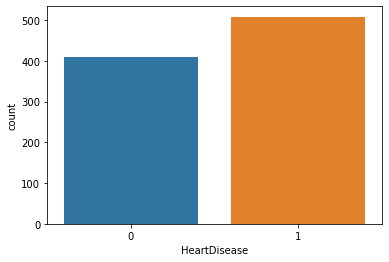

In [39]:
sns.countplot(x='HeartDisease', data=df)

1 Means person has Heart Disease

0 Means Person doesn't have Heart Disease

<AxesSubplot:xlabel='Gender', ylabel='count'>

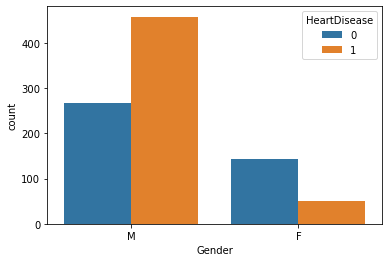

In [40]:
sns.countplot(x= df['Gender'], hue = 'HeartDisease', data = df)

Data distribution of cases with Yes/No heart disease according to Gender

<AxesSubplot:xlabel='Age', ylabel='count'>

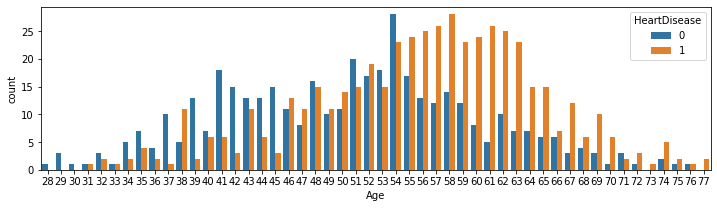

In [41]:
plt.figure(figsize = (12,3))
sns.countplot(x= df['Age'].sort_values(ascending=True), hue = 'HeartDisease', data = df)

Data distribution of cases with Yes/No heart disease according to Age

# Converting Categorical Features to Dummy Indicators

Get all categorical features

In [42]:
categorical_columns = [name for name in df.columns if df[name].dtype=='O']

print(f'There are {len(categorical_columns)} categorical features:\n')
print(", ".join(categorical_columns))

There are 5 categorical features:

Gender, ChestPainType, RestingECG, ExerciseAngina, ST_Slope


Transform all categorical attributes into binary variables where the value is 0 (representing No) or 1 (representing Yes).

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()

In [45]:
for i in categorical_columns:
    df[i] = label_encoder.fit_transform(df[i])
print("Encoded data")

Encoded data


In [46]:
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


Data Preprocessing

In [47]:
x = df.drop("HeartDisease",axis=1)

y = df["HeartDisease"]

In [50]:
x.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope'],
      dtype='object')

In [49]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

Splitting Data into Training and Test Set

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(f"No. of train datasets: x={x_train.shape} y={y_train.shape}")
print(f"No. of test datasets: x={x_test.shape} y={y_test.shape}\n")

No. of train datasets: x=(688, 11) y=(688,)
No. of test datasets: x=(230, 11) y=(230,)



## Creating a Model
The dataset is divided into two parts, with 70% allocated for training a predictive model of Heart Disease. The model is built using logistic regression,Random Forest, Decision Tree and XGBoost with built-in cross-validation.

Logistic Regression

In [52]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

print('Accuracy Score:- ', accuracy_score(y_test,pred_lr))

print('Confusion Matrix :- \n ', confusion_matrix(y_test,pred_lr))

print('Classification Report :- \n ',classification_report(y_test,pred_lr))

Accuracy Score:-  0.8347826086956521
Confusion Matrix :- 
  [[ 71  21]
 [ 17 121]]
Classification Report :- 
                precision    recall  f1-score   support

           0       0.81      0.77      0.79        92
           1       0.85      0.88      0.86       138

    accuracy                           0.83       230
   macro avg       0.83      0.82      0.83       230
weighted avg       0.83      0.83      0.83       230



Here we are getting 83% accuracy using Logistic Regression.

Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic Regressior Prediction Confusion Maxtrix ')

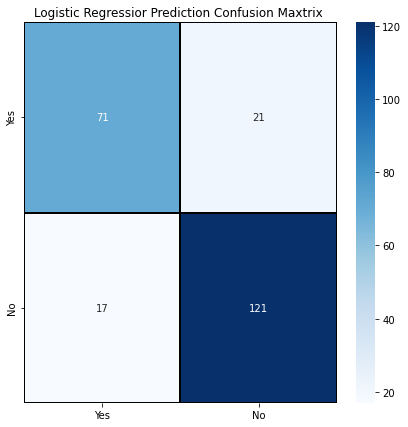

In [54]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ['Yes', 'No']
y_axis_labels = ['Yes', 'No']
f,ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm,annot = True, linewidths=.2,linecolor='black',fmt= '.0f',ax=ax, cmap = 'Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Logistic Regressior Prediction Confusion Maxtrix ')

Random Forest Classifier

In [55]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print('Random Forest Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_rfc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_rfc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_rfc))

Random Forest Accuracy Score is:- 
 
   0.8521739130434782

 Confusion Matrix is :-
   [[ 72  20]
 [ 14 124]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.84      0.78      0.81        92
           1       0.86      0.90      0.88       138

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230



Here we are getting 85% accuracy using Random Forest Classifier.

Confusion Matrix for Random Forest Classifier.

Text(0.5, 1.0, 'RFC Prediction Confusion Matrix')

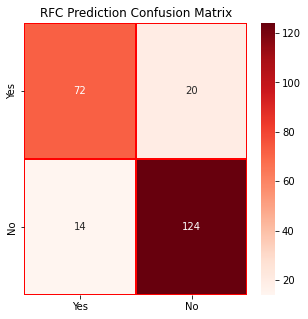

In [56]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='red',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title ('RFC Prediction Confusion Matrix')

Decision Tree Classifier

In [58]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print('Decision Tree Classifier Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_dtc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_dtc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_dtc))

Decision Tree Classifier Accuracy Score is:- 
 
   0.7956521739130434

 Confusion Matrix is :-
   [[ 70  22]
 [ 25 113]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.74      0.76      0.75        92
           1       0.84      0.82      0.83       138

    accuracy                           0.80       230
   macro avg       0.79      0.79      0.79       230
weighted avg       0.80      0.80      0.80       230



Here we are getting 79% accuracy using Decision Tree Classifier.

Confusion Matrix for Decision Tree Classifier.

Text(0.5, 1.0, 'DTC Prediction Confusion Matrix')

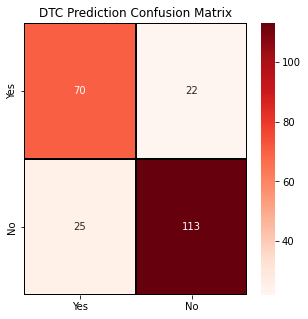

In [59]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('DTC Prediction Confusion Matrix')

Support Vector Machine Classifier

In [61]:
svc = SVC(kernel='linear',gamma='scale')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print('Accuracy Score :- ',accuracy_score(y_test,pred_svc))
print('Confusion Matrix \n ' ,confusion_matrix(y_test,pred_svc))
print('classification Report \n :- ',classification_report(y_test,pred_svc))

Accuracy Score :-  0.8304347826086956
Confusion Matrix 
  [[ 70  22]
 [ 17 121]]
classification Report 
 :-                precision    recall  f1-score   support

           0       0.80      0.76      0.78        92
           1       0.85      0.88      0.86       138

    accuracy                           0.83       230
   macro avg       0.83      0.82      0.82       230
weighted avg       0.83      0.83      0.83       230



Here we are getting 83% accuracy using SVM Classifier.

Confusion Matrix for SVM Classifier.

Text(0.5, 1.0, 'SVM Classifier confusion_matrix')

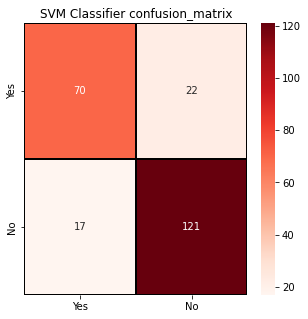

In [63]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title('SVM Classifier confusion_matrix')

XGB Classifier

In [64]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)
print('The Accuracy of XGBC is: ',accuracy_score(y_test,pred_XGBC))
print('Confusion Matrix of XGBC :- \n ', confusion_matrix(y_test,pred_XGBC))
print('classification report of XGBC:- \n ', classification_report(y_test,pred_XGBC))

The Accuracy of XGBC is:  0.8521739130434782
Confusion Matrix of XGBC :- 
  [[ 74  18]
 [ 16 122]]
classification report of XGBC:- 
                precision    recall  f1-score   support

           0       0.82      0.80      0.81        92
           1       0.87      0.88      0.88       138

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.85       230
weighted avg       0.85      0.85      0.85       230



Here we are getting 85% accuracy using XGB Classifier.

Confusion Matrix for XGB Classifier

Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

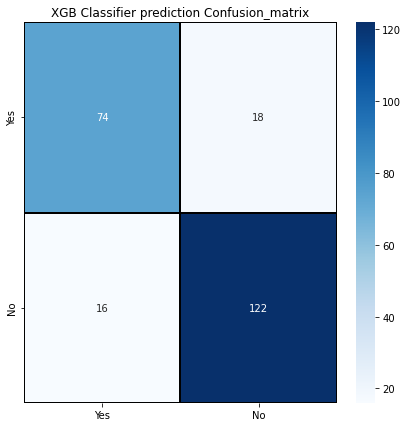

In [66]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

Cross Validation Score for all the model

In [74]:
#    CV Score for Logistic Regrassion 

print('CV Score for logistic Regression :- ',cross_val_score(lr,x,y,cv=4).mean())

#    CV Score for Random Forest Classifier

print('CV Score for Random Forest Classifier: ',cross_val_score(rfc,x,y,cv=4).mean())

#    CV Score for Decision tree Classifier

print('CV score for Decision Tree Classifier',cross_val_score(dtc,x,y,cv=4).mean())

#    CV Score for support vector Classifire

print('CV Score for Support Vector Classifier ',cross_val_score(svc,x,y,cv=4).mean())

#   CV score for XGB Classifier

print('CV Score for XGB Classifier',cross_val_score(XGBC,x,y,cv=10).mean())

CV Score for logistic Regression :-  0.8191000569584204
CV Score for Random Forest Classifier:  0.8550265805961648
CV score for Decision Tree Classifier 0.7690003797228024
CV Score for Support Vector Classifier  0.8267324852857414
CV Score for XGB Classifier 0.8397396082178691


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest and XGB Classifier is the best model.

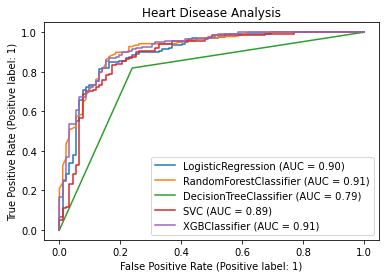

In [76]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(XGBC,x_test,y_test,ax=disp.ax_)

plt.title('Heart Disease Analysis')
plt.legend(prop={'size' : 10},loc = 'lower right')
plt.show()

Saving the Model

In [77]:
import pickle
filename = 'Heart_Disease_XGBc.pkl'
pickle.dump(XGBC,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [78]:
import pickle
filename = 'Heart_Disease_RFC.pkl'
pickle.dump(rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)